#  Prepare data

In [39]:
import pandas as pd
import numpy as np
import ta
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Set the style of seaborn

# The following allows to save plots in SVG format.
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Read adjusted price history

In [40]:
def read_history_csv(path):
    history = pd.read_csv(path, index_col='Date', parse_dates=True, \
        dtype={'Open': float, 'High': float, 'Low': float, 'Close': float,'Volume': float})
    return history

# 'gs' 'nvda' 'tsla' 'msft' 'aapl' 'ibm'
price_history = read_history_csv('yfinance/ibm.1d.adjusted.csv')

price_history['Median'] = (price_history['High'] + price_history['Low']) / 2
price_history['Typical'] = (price_history['High'] + price_history['Low'] + price_history['Close']) / 3
price_history

,Open,High,Low,Close,Volume,Median,Typical
Date,,,,,,,
1962-01-02 00:00:00-05:00,1.543904,1.543904,1.526557,1.526557,1.948437e+06,1.535231,1.532339
1962-01-03 00:00:00-05:00,1.526556,1.539900,1.526556,1.539900,1.461328e+06,1.533228,1.535452
1962-01-04 00:00:00-05:00,1.539900,1.539900,1.523888,1.524555,1.311448e+06,1.531894,1.529448
1962-01-05 00:00:00-05:00,1.522554,1.522554,1.491862,1.494531,1.836027e+06,1.507208,1.502982
1962-01-08 00:00:00-05:00,1.493197,1.493197,1.454499,1.466509,2.735306e+06,1.473848,1.471402
...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,167.500000,168.059998,166.759995,167.559998,2.414900e+06,167.409996,167.459997
2024-05-14 00:00:00-04:00,167.860001,168.130005,166.479996,167.360001,2.601000e+06,167.305000,167.323334
2024-05-15 00:00:00-04:00,167.940002,168.350006,167.339996,168.259995,4.468800e+06,167.845001,167.983332


## Add TA indicators

In [41]:
data = price_history.copy()

priceName = 'Typical'

data['RSI(14)'] = ta.momentum.rsi(data[priceName], window=14, fillna=True)
#data['SMA(12)'] = ta.trend.sma_indicator(data[priceName], window=12, fillna=True)
data['EMA(5)'] = ta.trend.ema_indicator(data[priceName], window=12, fillna=True)
data['EMA(12)'] = ta.trend.ema_indicator(data[priceName], window=12, fillna=True)
data['OBV'] = ta.volume.on_balance_volume(data[priceName], data['Volume'], fillna=True)

macd = ta.trend.MACD(data[priceName], window_slow=26, window_fast=12, window_sign=9, fillna=True)
data['MACD(26,12,9)'] = macd.macd()
data['MACD(26,12,9) signal'] = macd.macd_signal()
data['MACD(26,12,9) diff'] = macd.macd_diff()

data

,Open,High,Low,Close,Volume,Median,Typical,RSI(14),EMA(5),EMA(12),OBV,"MACD(26,12,9)","MACD(26,12,9) signal","MACD(26,12,9) diff"
Date,,,,,,,,,,,,,,
1962-01-02 00:00:00-05:00,1.543904,1.543904,1.526557,1.526557,1.948437e+06,1.535231,1.532339,100.000000,1.532339,1.532339,1.948437e+06,0.000000,0.000000,0.000000
1962-01-03 00:00:00-05:00,1.526556,1.539900,1.526556,1.539900,1.461328e+06,1.533228,1.535452,100.000000,1.532818,1.532818,3.409765e+06,0.000248,0.000050,0.000199
1962-01-04 00:00:00-05:00,1.539900,1.539900,1.523888,1.524555,1.311448e+06,1.531894,1.529448,32.495720,1.532300,1.532300,2.098317e+06,-0.000039,0.000032,-0.000071
1962-01-05 00:00:00-05:00,1.522554,1.522554,1.491862,1.494531,1.836027e+06,1.507208,1.502982,7.729653,1.527789,1.527789,2.622894e+05,-0.002375,-0.000449,-0.001925
1962-01-08 00:00:00-05:00,1.493197,1.493197,1.454499,1.466509,2.735306e+06,1.473848,1.471402,3.905025,1.519114,1.519114,-2.473016e+06,-0.006697,-0.001699,-0.004998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,167.500000,168.059998,166.759995,167.559998,2.414900e+06,167.409996,167.459997,35.120193,168.087048,168.087048,4.210783e+09,-4.530692,-4.906433,0.375741
2024-05-14 00:00:00-04:00,167.860001,168.130005,166.479996,167.360001,2.601000e+06,167.305000,167.323334,34.858715,167.969553,167.969553,4.208182e+09,-4.256009,-4.776349,0.520340
2024-05-15 00:00:00-04:00,167.940002,168.350006,167.339996,168.259995,4.468800e+06,167.845001,167.983332,37.287069,167.971673,167.971673,4.212651e+09,-3.939650,-4.609009,0.669359


## Correlation matrix

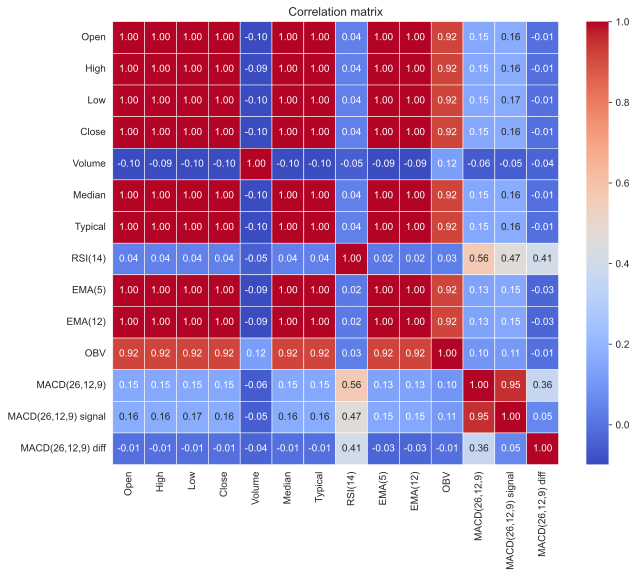

In [42]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

## Training-testing split

In [43]:
split_ratio = 0.2
df_train, df_test = train_test_split(data, test_size=split_ratio, shuffle=False)

df_train.to_csv('data.training.csv', index=True)
df_test.to_csv('data.testing.csv', index=True)

print(df_train.describe())

               Open          High           Low         Close        Volume  \
count  12561.000000  12561.000000  12561.000000  12561.000000  1.256100e+04   
mean      20.358873     20.582077     20.152099     20.370546  1.136296e+07   
std       24.005297     24.270492     23.769537     24.031368  9.172618e+06   
min        0.816894      0.858274      0.800877      0.816895  0.000000e+00   
25%        3.741609      3.766473      3.714204      3.740035  4.494859e+06   
50%        9.923211     10.007374      9.835871      9.919426  9.811204e+06   
75%       40.468927     41.004228     40.108845     40.458225  1.540057e+07   
max      112.512687    112.988562    111.209155    112.867844  1.347071e+08   

             Median       Typical       RSI(14)        EMA(5)       EMA(12)  \
count  12561.000000  12561.000000  12561.000000  12561.000000  12561.000000   
mean      20.367088     20.368240     52.454792     20.320700     20.320700   
std       24.019112     24.022899     14.735158    

In [44]:
df_train

,Open,High,Low,Close,Volume,Median,Typical,RSI(14),EMA(5),EMA(12),OBV,"MACD(26,12,9)","MACD(26,12,9) signal","MACD(26,12,9) diff"
Date,,,,,,,,,,,,,,
1962-01-02 00:00:00-05:00,1.543904,1.543904,1.526557,1.526557,1.948437e+06,1.535231,1.532339,100.000000,1.532339,1.532339,1.948437e+06,0.000000,0.000000,0.000000
1962-01-03 00:00:00-05:00,1.526556,1.539900,1.526556,1.539900,1.461328e+06,1.533228,1.535452,100.000000,1.532818,1.532818,3.409765e+06,0.000248,0.000050,0.000199
1962-01-04 00:00:00-05:00,1.539900,1.539900,1.523888,1.524555,1.311448e+06,1.531894,1.529448,32.495720,1.532300,1.532300,2.098317e+06,-0.000039,0.000032,-0.000071
1962-01-05 00:00:00-05:00,1.522554,1.522554,1.491862,1.494531,1.836027e+06,1.507208,1.502982,7.729653,1.527789,1.527789,2.622894e+05,-0.002375,-0.000449,-0.001925
1962-01-08 00:00:00-05:00,1.493197,1.493197,1.454499,1.466509,2.735306e+06,1.473848,1.471402,3.905025,1.519114,1.519114,-2.473016e+06,-0.006697,-0.001699,-0.004998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-15 00:00:00-05:00,111.513528,112.988562,110.413210,112.262939,7.709360e+06,111.700886,111.888237,60.744822,110.243490,110.243490,3.902618e+09,1.359365,1.322631,0.036735
2011-11-16 00:00:00-05:00,111.709760,112.946881,110.805709,110.996033,7.762324e+06,111.876295,111.582874,59.485401,110.449549,110.449549,3.894855e+09,1.365517,1.331208,0.034309
2011-11-17 00:00:00-05:00,111.109011,112.310447,109.074891,110.466652,9.819760e+06,110.692669,110.617330,55.562697,110.475362,110.475362,3.885035e+09,1.277752,1.320517,-0.042765


In [45]:
print(df_test.describe())

              Open         High          Low        Close        Volume  \
count  3141.000000  3141.000000  3141.000000  3141.000000  3.141000e+03   
mean    112.977358   113.844328   112.133582   112.995555  6.328462e+06   
std      17.194466    17.270510    17.129822    17.212585  3.646801e+06   
min      73.629063    76.072984    70.484649    73.761375  1.539956e+06   
25%     102.473698   103.198706   101.859941   102.404297  4.324573e+06   
50%     110.632507   111.583221   109.828692   110.751419  5.473907e+06   
75%     119.581819   120.365699   118.753979   119.518898  7.081331e+06   
max     195.637925   197.222201   194.212077   195.835968  4.695297e+07   

            Median      Typical      RSI(14)       EMA(5)      EMA(12)  \
count  3141.000000  3141.000000  3141.000000  3141.000000  3141.000000   
mean    112.988955   112.991155    51.586238   112.889503   112.889503   
std      17.194044    17.197638    14.534926    16.835257    16.835257   
min      73.278816    73.439

In [46]:
df_test

,Open,High,Low,Close,Volume,Median,Typical,RSI(14),EMA(5),EMA(12),OBV,"MACD(26,12,9)","MACD(26,12,9) signal","MACD(26,12,9) diff"
Date,,,,,,,,,,,,,,
2011-11-22 00:00:00-05:00,108.379039,108.831065,107.231133,107.837799,7.025570e+06,108.031099,107.966666,45.927812,109.777087,109.777087,3.861893e+09,0.666824,1.104891,-0.438067
2011-11-23 00:00:00-05:00,107.457126,107.944835,105.583598,105.839348,8.071857e+06,106.764217,106.455927,41.201360,109.266139,109.266139,3.853821e+09,0.352493,0.954411,-0.601918
2011-11-25 00:00:00-05:00,105.875065,106.796963,105.310036,105.310036,3.754054e+06,106.053500,105.805678,39.325466,108.733761,108.733761,3.850067e+09,0.050335,0.773596,-0.723261
2011-11-28 00:00:00-05:00,108.670509,108.801360,107.457177,108.373123,7.606632e+06,108.129268,108.210553,48.639241,108.653267,108.653267,3.857673e+09,0.004869,0.619851,-0.614982
2011-11-29 00:00:00-05:00,108.260094,109.027352,107.558271,107.617744,6.156326e+06,108.292812,108.067789,48.166552,108.563194,108.563194,3.851517e+09,-0.042197,0.487441,-0.529638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,167.500000,168.059998,166.759995,167.559998,2.414900e+06,167.409996,167.459997,35.120193,168.087048,168.087048,4.210783e+09,-4.530692,-4.906433,0.375741
2024-05-14 00:00:00-04:00,167.860001,168.130005,166.479996,167.360001,2.601000e+06,167.305000,167.323334,34.858715,167.969553,167.969553,4.208182e+09,-4.256009,-4.776349,0.520340
2024-05-15 00:00:00-04:00,167.940002,168.350006,167.339996,168.259995,4.468800e+06,167.845001,167.983332,37.287069,167.971673,167.971673,4.212651e+09,-3.939650,-4.609009,0.669359


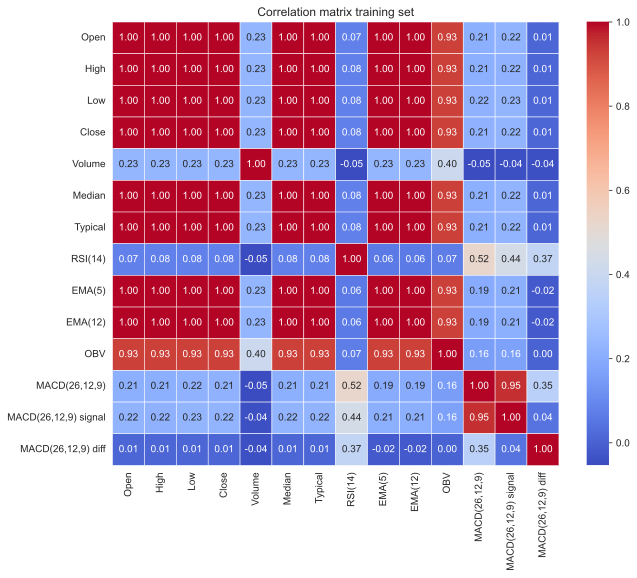

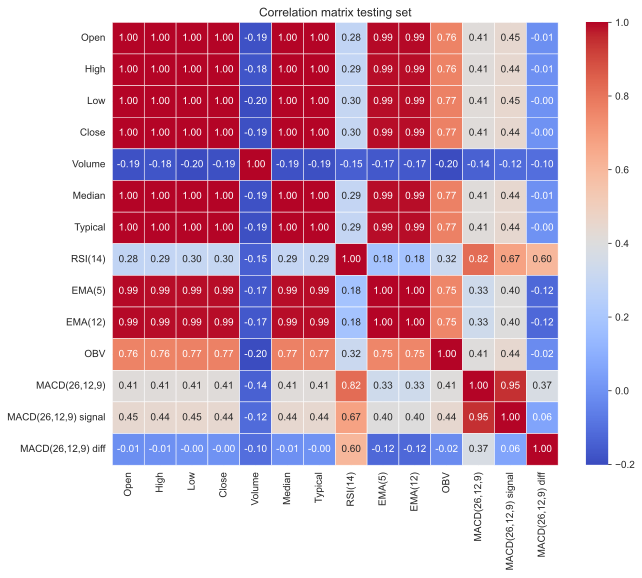

In [47]:
correlation_matrix_train = df_train.corr()
correlation_matrix_test = df_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix training set')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix testing set')
plt.show()

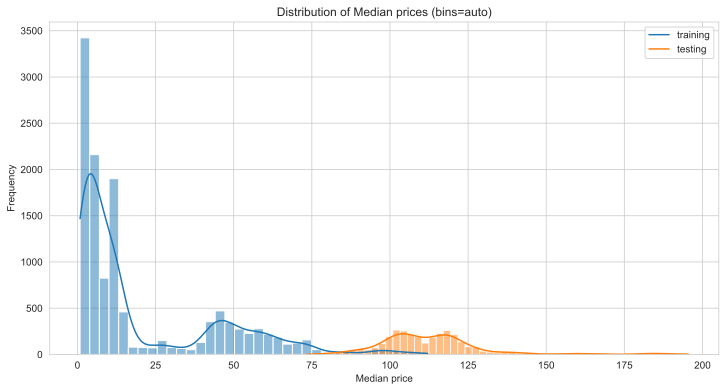

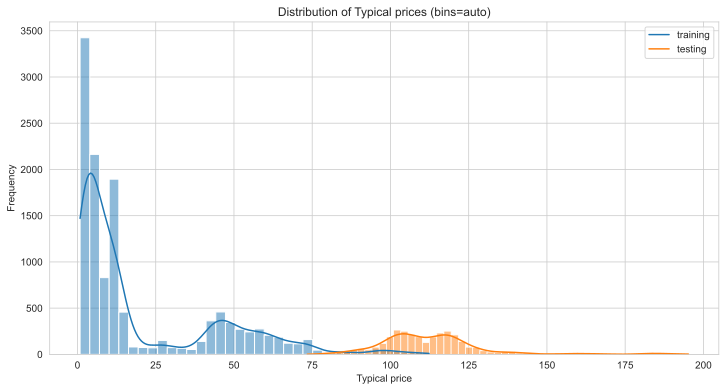

In [48]:
# bins: integer or 'auto', 'scott', 'rice', 'sturges', 'sqrt'
def histogram_prices(training, testing, what, bins=50):
    plt.figure(figsize=(12, 6))
    sns.histplot(training[what], bins=bins, kde=True)
    sns.histplot(testing[what], bins=bins, kde=True)
    #plt.hist(training[what], bins=bins)
    #plt.hist(testing[what], bins=bins)
    plt.title('Distribution of ' + what + ' prices (bins=' + str(bins) + ')')
    plt.xlabel(what + ' price')
    plt.ylabel('Frequency')
    plt.legend(['training', 'testing'], loc='best')
    plt.show()

histogram_prices(df_train, df_test, 'Median', bins='auto')
histogram_prices(df_train, df_test, 'Typical', bins='auto')


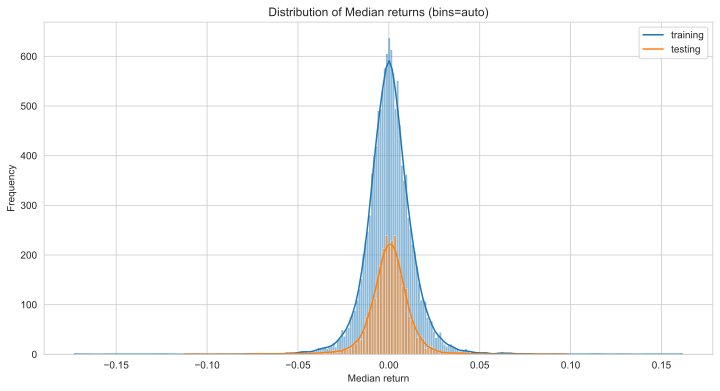

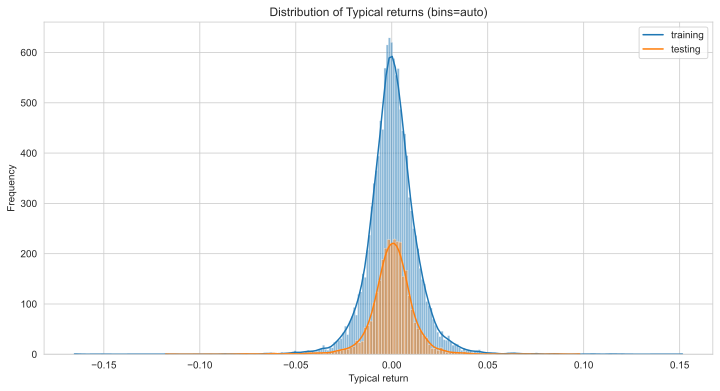

In [49]:
df_train['Median returns'] = df_train['Median'].pct_change()
df_train['Typical returns'] = df_train['Typical'].pct_change()
df_test['Median returns'] = df_test['Median'].pct_change()
df_test['Typical returns'] = df_test['Typical'].pct_change()

# bins: integer or 'auto', 'scott', 'rice', 'sturges', 'sqrt'
def histogram_returns(training, testing, what, bins=50):
    plt.figure(figsize=(12, 6))
    sns.histplot(training[what + ' returns'], bins=bins, kde=True)
    sns.histplot(testing[what + ' returns'], bins=bins, kde=True)
    #plt.hist(training[what + ' returns'], bins=bins)
    #plt.hist(testing[what + ' returns'], bins=bins)
    plt.title('Distribution of ' + what + ' returns (bins=' + str(bins) + ')')
    plt.xlabel(what + ' return')
    plt.ylabel('Frequency')
    plt.legend(['training', 'testing'], loc='best')
    plt.show()

histogram_returns(df_train, df_test, 'Median', bins='auto')
histogram_returns(df_train, df_test, 'Typical', bins='auto')